In [1]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a60a9d68f5a8492f056f19398ca37c3a0a10dcad06f94b0bc6583bedfbdf4670
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


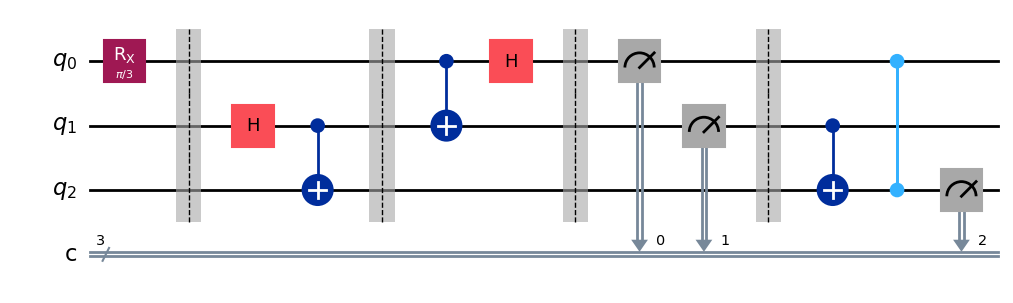

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

# 1. Initialize the Circuit
# Q0 = The qubit to teleport (The Message)
# Q1 = Alice's half of the entangled pair
# Q2 = Bob's half (The Destination)
qc = QuantumCircuit(3, 3)

# 2. Prepare the "Message" on Q0
# Let's put it in a specific state using a rotation
qc.rx(np.pi/3, 0)
qc.barrier()

# 3. Create Entanglement (Bell Pair) between Q1 and Q2
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# 4. Alice performs operations on Q0 and Q1
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# 5. Measurement
qc.measure([0, 1], [0, 1])
qc.barrier()

# 6. Bob applies gates based on Alice's measurement results
qc.cx(1, 2)
qc.cz(0, 2)

# 7. Final measurement of Bob's qubit to verify teleportation
qc.measure(2, 2)

qc.draw('mpl')

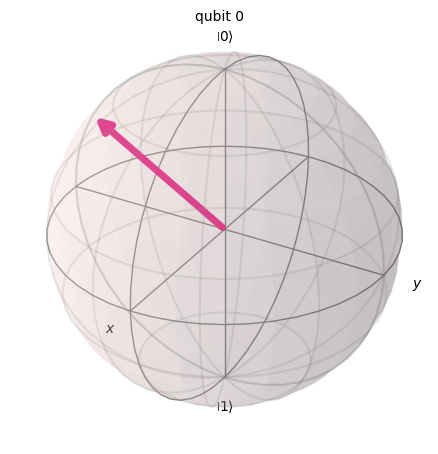

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# 1. Setup the simulator
sim = AerSimulator()

# 2. Create the circuit
qc_init = QuantumCircuit(1)
qc_init.rx(np.pi/3, 0) # Rotate the qubit

# 3. CRITICAL STEP: Tell the simulator to save the statevector
# This adds a special instruction that doesn't exist on real hardware
# but works in simulation.
qc_init.save_statevector()

# 4. Run the simulation
result = sim.run(qc_init).result()

# 5. Get and display the statevector
out_state = result.get_statevector()
display(plot_bloch_multivector(out_state))